<a href="https://colab.research.google.com/github/inuwamobarak/Image-captioning-ViT/blob/main/Image_Captioning_using_Transformer_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

# Importing Required Libraries

In [1]:
# Installing Transformer Libraries
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 86.5 MB/s eta 0:00:00


In [2]:
import requests
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, GPT2TokenizerFast
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

# Using a Trained Model

In [3]:
# Loading a fine-tuned image captioning Transformer Model

# ViT Encoder - Decoder Model
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning").to(device)
# Corresponding ViT Tokenizer
tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
# Image processor
image_processor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

Some weights of the model checkpoint at nlpconnect/vit-gpt2-image-captioning were not used when initializing VisionEncoderDecoderModel: ['decoder.transformer.h.2.crossattention.bias', 'decoder.transformer.h.9.attn.masked_bias', 'decoder.transformer.h.3.attn.bias', 'decoder.transformer.h.8.crossattention.bias', 'decoder.transformer.h.0.crossattention.masked_bias', 'decoder.transformer.h.1.crossattention.bias', 'decoder.transformer.h.1.crossattention.masked_bias', 'decoder.transformer.h.4.crossattention.masked_bias', 'decoder.transformer.h.5.crossattention.bias', 'decoder.transformer.h.2.attn.bias', 'decoder.transformer.h.10.attn.bias', 'decoder.transformer.h.6.attn.bias', 'decoder.transformer.h.7.attn.masked_bias', 'decoder.transformer.h.5.attn.bias', 'decoder.transformer.h.0.attn.bias', 'decoder.transformer.h.10.crossattention.masked_bias', 'decoder.transformer.h.9.crossattention.masked_bias', 'decoder.transformer.h.7.attn.bias', 'decoder.transformer.h.7.crossattention.masked_bias', 'd

# Preparing Image Data

Preparing image for capturing

In [4]:
# Accesssing images from the web
import urllib.parse as parse
import os
import requests
# Verify url
def check_url(string):
    try:
        result = parse.urlparse(string)
        return all([result.scheme, result.netloc, result.path])
    except:
        return False

# Load an image
def load_image(image_path):
    if check_url(image_path):
        return Image.open(requests.get(image_path, stream=True).raw)
    elif os.path.exists(image_path):
        return Image.open(image_path)

# Performing Inference on Image

In [5]:
# Image inference
def get_caption(model, image_processor, tokenizer, image_path):
    image = load_image(image_path)
    # Preprocessing the Image
    img = image_processor(image, return_tensors="pt").to(device)
    # Generating captions
    output = model.generate(**img)
    # decode the output
    caption = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
    return caption

# Loading and Capturing Images

In [6]:
#  Image media display
from IPython.display import display

*Example 1.*

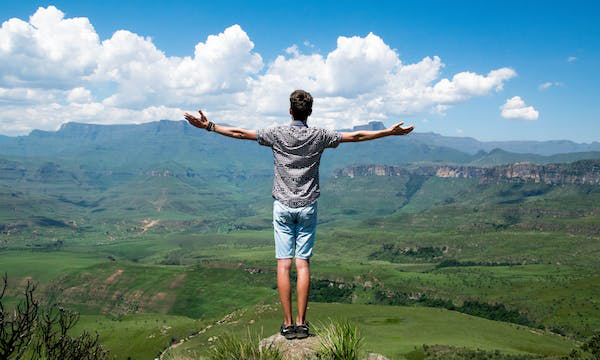

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1353: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'a man standing on top of a hill with a mountain '

In [7]:
# Loading URLs
url = "https://images.pexels.com/photos/103123/pexels-photo-103123.jpeg?auto=compress&cs=tinysrgb&w=600"
# Display Image
display(load_image(url))
# Display Caption
get_caption(model, image_processor, tokenizer, url)

*Example 2.*

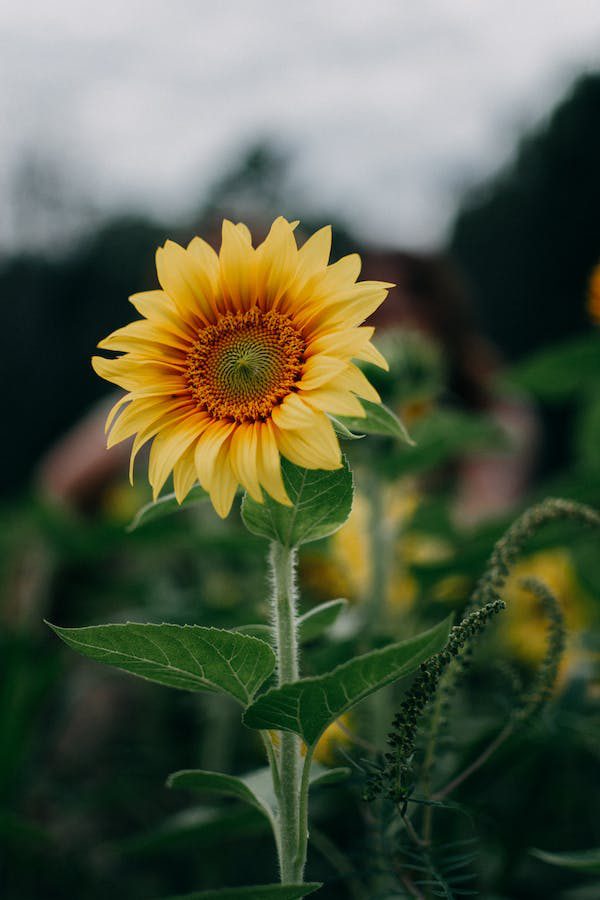

'a flower in a vase with a bunch of leaves '

In [8]:
# Loading URLs
url = "https://images.pexels.com/photos/1366630/pexels-photo-1366630.jpeg?auto=compress&cs=tinysrgb&w=600"
# Display Image
display(load_image(url))
# Display Caption
get_caption(model, image_processor, tokenizer, url)

*Example 3.*

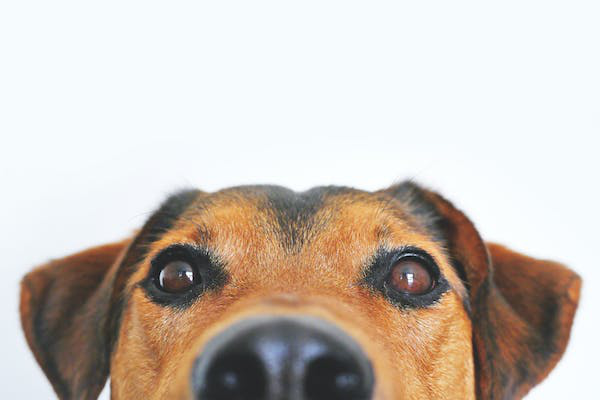

'a dog with a long nose '

In [9]:
# Loading URLs
url = "https://images.pexels.com/photos/406014/pexels-photo-406014.jpeg?auto=compress&cs=tinysrgb&w=600"
# Display Image
display(load_image(url))
# Display Caption
get_caption(model, image_processor, tokenizer, url)

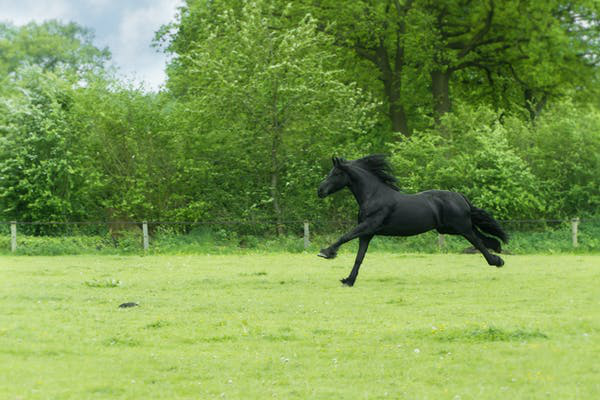

'a black horse running through a grassy field '

In [10]:
# Loading URLs
url = "https://images.pexels.com/photos/101667/pexels-photo-101667.jpeg?auto=compress&cs=tinysrgb&w=600"
# Display Image
display(load_image(url))
# Display Caption
get_caption(model, image_processor, tokenizer, url)